In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

#### Support Vector Machines
SVMs are supervised machine learning Algos, which can be used for both Classification and Regression Tasks. In Classification it's aim is to create a hyperplane that seprates the training data into distinct catgorires. While, in regression it tries to fit a best fit line.

1)  What is a HyperPlane :-

    A hyperplane is a decision boundary that separates data into distinct classes. In **2-D**, this hyperplane becomes a line separating the data. In **3-D**, this hyperplane becomes a plane separating the data. In general, in an **N**-dimensional space, this hyperplane will be **(N-1)** dimensional. (It is also Known as Hard Margin plane)

2) In order to find this HyperPlane we will use the help of **Support Vectors** :-

    Data points closest to the hyperplane are called support vectors, and the lines passing through these vectors are called marginal planes, more specifically, the soft margin planes. These points help us determine the position and orientation of the hyperplane.

They do this by helping us calculate the margins, or the distance between the two marginal planes on both sides of the hyperplane.

In SVMs, our final goal is to maximize this distance while correctly classifying the data points.

![ExplainPNG](imgs\basicexplain.png)

Now, as you can see, the points above the hyperplane are in Blue and the points below are in Red. Mathematically, when a point is on the line, plugging that point into the equation of the line yields 0. If the point is above the line, the result is positive, and if the point is below the line, the result is negative. Thus, if we encounter a negative sample (i.e., a sample below the hyperplane), it belongs to the Red class, and vice versa.

Let's right all this mathematically:-


Our basic decision-making rule will be the hyperplane equation:
$$ y = W^T X - b $$

### Decision Rule:
- For a point $ X $ on the hyperplane:
  $$ W^T X - b = 0 $$
- For a point  $ X $  above the hyperplane (red class):
  $$ W^T X - b > 0 $$
- For a point  $ X $  below the hyperplane (blue class):
  $$ W^T X - b < 0 $$

This means (equation of Soft Margins, as they pass through a data point):
- $ W^T X - b = 1 $ we can say that this is the Soft margin
- similarly $ W^T X - b = -1 $ is also a soft margin.

Now, with the help of this, we can find the distance between these margins.

#### Derivation of the Margin Distance
1. **Equation of Soft Margins**:
   - The equations for the soft margins are:
     $$ W^T X - b = 1 $$
     $$ W^T X - b = -1 $$

2. **Finding Points on the Margins**:
   - Consider two points, $ X_1 $ and $ X_2 $, that lie on these soft margins. 
   - For $ X_1 $ on the margin $ W^T X - b = 1 $:
     $$ W^T X_1 - b = 1 $$
   - For $ X_2 $ on the margin $ W^T X - b = -1 $:
     $$ W^T X_2 - b = -1 $$

3. **Subtracting the Equations**:
   - Subtract the second equation from the first:
     $$ W^T X_1 - b - (W^T X_2 - b) = 1 - (-1) $$
     $$ W^T X_1 - W^T X_2 = 2 $$

4. **Rewriting in Terms of $ W $**:
   - Factor out $ W^T $ on the left-hand side:
     $$ W^T (X_1 - X_2) = 2 $$

5. **Distance Between Two Points**:
   - The distance between the two points, $ X_1 $ and $ X_2 $, in the direction of the vector $ W $ is given by:
     $$ \|X_1 - X_2\| = \frac{2}{\|W\|} $$

- The term $ \|W\| $ represents the length (norm) of the weight vector $ W $. The unit vector in the direction of $ W $ is given by dividing $ W $ by its norm, $ \frac{W}{\|W\|} $.


### Conclusion
- Thus, the distance (margin) between the two soft margins is:
  $$
  \text{Distance} = \frac{2}{\|W\|}
  $$

This distance is what SVM aims to maximize to ensure the best separation between classes. We can also say that :-
  $$
  \text{Distance} = \frac{\|W\|}{2}
  $$
  We need to minimize this value.

Further, we create a constraint value as :-

  - $ y_i = +1 $ if $ W^T X_i - b \geq 1 $
  - $ y_i = -1 $ if $ W^T X_i - b \leq -1 $

Now, if we multiply this constraint value $ y_i $ with the original hyperplane equation $ W^T X_i - b $, we obtain:

$$ y_i (W^T X_i - b) \geq 1 $$

This constraint value, ensures that the point lies on the correct side of the HyperPlane.

Previously, I mentioned that in SVM, our goal is to minimize the distance $ \frac{\|W\|}{2} $ between the hyperplanes while minimizing misclassifications. To achieve this, we create a cost or loss function for the model.

#### Cost or Loss Function

The SVM cost or loss function combines two main components:

1. **Regularization Term**:
   $$ \frac{1}{2} \|W\|^2 $$
   - This term penalizes the complexity of the model by penalizing large values of the weight vector $ W $. It encourages a simpler model and helps prevent overfitting.

2. **Hinge Loss**:
   $$ \sum_{i=1}^{n} \max(0, 1 - y_i (W^T X_i - b)) $$
   - The hinge loss function measures the total loss incurred by the model for misclassifying data points. It is zero for correctly classified points and increases linearly with the margin violation for misclassified points.

#### Optimization Objective

The SVM optimization objective is to minimize the combined cost function:
$$ \text{Loss} = \frac{1}{2} \|W\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (W^T X_i - b)) $$

- $ \|W\|^2 $ is the regularization term that controls the complexity of the model (we squared the $ \|W\| $ for mathematical convenience).
- $ C $ is a regularization parameter that balances the trade-off between maximizing the margin and minimizing misclassifications.
- The sum $ \sum_{i=1}^{n} \max(0, 1 - y_i (W^T X_i - b)) $ calculates the hinge loss, penalizing misclassifications.

This 1/2 above is also simply written as Lambda providing more control over this regularication term.SO, finally
$$ \text{Loss} = \lambda\|W\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i (W^T X_i - b)) $$

By minimizing this combined loss function, SVM finds an optimal decision boundary that maximizes the margin $ \frac{2}{\|W\|} $ between classes while minimizing misclassification errors. This approach ensures a robust and well-generalized model suitable for various classification tasks.

For now we will use a Simple update rule to find the optimal parameters, but later we will discus and algorithm that is used in SVMs to Optimize it and solve the problem of **Quadratic programming**.

#### Update Rule

The update rule for SVMs adjusts the parameters $ W $ and $ b $ iteratively based on the gradient of the loss function:

1. **If** $ y_i (W^T X_i - b) \geq 1 $:
   - Update $ W $ as $ W = W - \eta \cdot (2 \lambda W) $
   - Update $ b $ as $ b = b $

2. **Else** $ y_i (W^T X_i - b) < 1 $:
   - Update $ W $ as $ W = W - \eta \cdot (2 \lambda W - C \cdot X_i y_i) $
   - Update $ b $ as $ b = b - \eta \cdot C \cdot y_i $

Here,
- $ \eta $ is the learning rate.
- $ \lambda $ is the regularization parameter.
- C is the regularization parameter that that controls the trade-off between margin maximization and misclassification.
- $ (X_i, y_i) $ are the training data point and its corresponding label.


(To Make More sense of this and to explore other ways to reach the funtions and conditions, i have a more detailed explanation in Pen and Paper)


Let's start Coding up our SVM algo for Classification task.


X.shape (100, 2)
y.shape (100,)
X [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]
 [-2.44166942  7.58953794]
 [ 3.40292813  0.65271307]
 [-2.97867201  9.55684617]
 [-3.83738367  9.21114736]
 [ 3.95985411  2.20542338]
 [ 3.85662554  1.65110817]
 [ 4.70010905  4.4364118 ]
 [ 3.56898634  2.4556421 ]
 [ 4.69808755  0.83019939]
 [-2.41743685  7.02671721]
 [ 4.85397258  0.72743091]
 [ 4.44751787  2.27471703]
 [ 5.43091078  1.06378223]
 [ 5.60325497  2.38595061]
 [ 4.89976163  2.75499256]
 [-0.92998481  9.78172086]
 [ 4.56277713  2.31432166]
 [-1.6966718  10.37052616]
 [ 5.1618204   2.27015436]
 [ 4.375222    4.69333885]
 [-2.743351    8.78014917]
 [-3.98771961  8.29444192]
 [-3.6601912   9.38998415]
 [-1.04354885  8.78850983]
 [-2.16557933  7.25124597]
 [ 5.22673593  4.1636

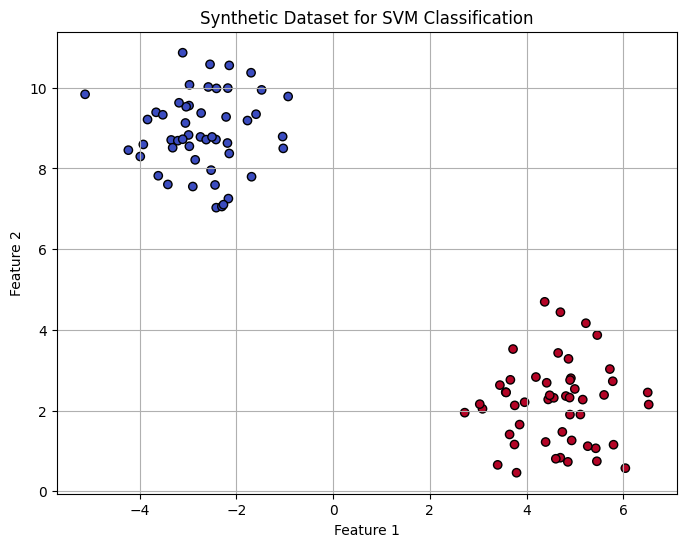

In [2]:
# Generating a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)


# Checking the Datasets Shape
print("X.shape" , X.shape)
print("y.shape", y.shape)

print("X", X)
print("y", y)

# Ploting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Synthetic Dataset for SVM Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

#### In the Above graph we need to find the hyperPlane that best Seperates these 2 classes.

In [3]:
def run_SVM(X, y, W, b, eta, num_iter, lambda_, C):
    """
    This function runs the SVM and finds the optimal hyperplane to classify 
    (by finding optimal W and b).

    Args:
        X (ndarray): Training input features
        y (ndarray): Training target values
        W (ndarray): Initial value of W
        b (scalar): Initial value of b
        eta (scalar): Learning rate
        num_iter (scalar): Total number of iterations
        lambda_ (scalar): Regularization parameter
        C (scalar): Regularization parameter
    
    Returns:
        W_final (ndarray): Final value of W
        b_final (ndarray): Final value of b
    """
    
    y_ = np.where(y <= 0, -1, 1)  # Ensure y is either 1 or -1

    for _ in range(num_iter):  # Running the update rule iter times
        for idx, x_i in enumerate(X):
            condition = (y_[idx] * (np.dot(W, x_i) - b) >= 1)  # Check the update rule condition
            if condition:
                W -= eta * (2 * lambda_ * W)   
                b = b  # b remains unchanged
            else:
                W -= eta * (2 * lambda_ * W - (C * np.dot(x_i, y_[idx])))  
                b -= eta * C * y_[idx]

    W_final = W
    b_final = b

    return W_final, b_final  # Return the updated W and b

In [4]:
# let's now Run SVM and predict values.
w_initial  = np.random.rand(X.shape[1])
b_intial = 0
iteration = 1000
lr= 1.0e-5
lambda_ = 0.5
C = 5  #larger value means less tolerence for errors
W_final, b_final = run_SVM(X,y,w_initial,b_intial,lr,iteration,lambda_,C)

print(f"Final values of W and b:{W_final} \n {b_final} ")

Final values of W and b:[ 0.38101228 -0.0668295 ] 
 0.040450000000000645 


In [5]:
#let's make some predictions
def predict(X,W,b):
    """
        This function makes the predictions

    Args:
        X (ndarray) : input query
        W (ndarray) : optimal value of w
        b (scalar) : optimal value of b
    Returns:
        prediction (ndarray) : predicted values
    """
    predictions = np.sign(np.dot(X, W) - b)
    return predictions

prediction = predict(X,W_final,b_final)
print("Prediction made: ",prediction)

#let's check the accuracy
def accuracy(y_true,y_pred):
    """
        This function calculates the accruacy of our model

    Agrs:
        y_true (ndarray) : target values
        y_pred (ndarray) : prediction made by our model
    Returns:
        acc (scalar) : accuracy
    """
    y_true_ = np.where(y_true <= 0, -1, 1)
    correct = np.sum(y_true_ == y_pred)
    total = len(y_true)
    acc = (correct / total) * 100
    return acc

print("accuracy of our model:", accuracy(y,prediction))

Prediction made:  [-1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.
  1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.
  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
accuracy of our model: 100.0


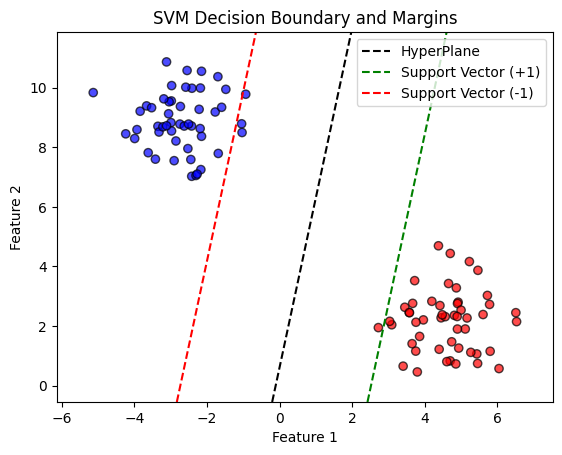

In [6]:
# Now that we found the optimal values of W,b let's plot the HyperPlane and Marginal PLanes (support vectors).

def plot_svm_decision_boundary(X, y, W, b):
    def hyperplane(x, W, b, offset):
        return (-W[0] * x - b + offset) / W[1]
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolors='k')

    x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
    y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    # Plot decision boundary (hyperplane)
    plt.plot(xx, hyperplane(xx, W, b, 0), 'k--', label='HyperPlane')
    
    # Plot margin lines
    plt.plot(xx, hyperplane(xx, W, b, 1), 'g--', label='Support Vector (+1)')
    plt.plot(xx, hyperplane(xx, W, b, -1), 'r--', label='Support Vector (-1)')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('SVM Decision Boundary and Margins')
    plt.show()

# Plotting
plot_svm_decision_boundary(X, y, W_final, b_final)

Now, our SVM ran elegantly and was able to find the optimal hyperplane and the corresponding marginal planes. This was because our data was linearly separable, which will not always be the case. For example, if we have data points that look like this:

<img src="./imgs/badcasepoints.png" alt="Bad Case Points" width="500" height="500">

In these we can't direclty apply the normal Linear Method, there are 2 ways to tackel this.
1) **Adding Another Dimension (Linear Transformation):** In this approach, we create a new feature or set of features that represent a transformation or relationship between the original input features. For instance, if we have input features $ X = [x_1, x_2] $, we could add a third feature $ x_3 = x_1 \times x_2 $. By incorporating this new feature into our SVM model, we attempt to find a hyperplane that separates the data in this higher-dimensional space. While effective, this method can be computationally expensive because it requires explicitly computing relations between input features.

2) **Kernel Trick (Non-linear Transformation):** Alternatively, we can use a kernel function to implicitly compute the dot product in a higher-dimensional space. A kernel function $ K(X_i, X_j) $ allows us to find complex, non-linear decision boundaries in the original feature space without explicitly transforming the data. This approach is computationally efficient and is a powerful technique for handling non-linearly separable data in SVMs.


### **Kernel Trick**
Instead of transforming the data explicitly, the kernel trick uses a function called a kernel that computes the similarity between pairs of data points in their original space. (still learning)
